<a href="https://colab.research.google.com/github/netonakano/imersao_python/blob/main/%5BImers%C3%A3o_Python%5D_Aula_04_PTR3_END_DATA_ATUAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Criando Gráficos de Candlestick com Matplotlib
![Candlestick Chart](https://i.imgur.com/84LtMlN.png)


![Candlestick](https://www.bussoladoinvestidor.com.br/wp-content/uploads/2019/12/upload_cms_candlestick_Candlestick1.png)

Fonte: https://www.bussoladoinvestidor.com.br/grafico-de-candlestick/

In [4]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.2 MB/s eta 0:00:00


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime


In [19]:
# Obter a data atual
data_atual = datetime.today().strftime('%Y-%m-%d')
data_atual

'2024-03-28'

In [21]:
dados = yf.download('PETR3.SA', start='2023-01-01', end=data_atual)
dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,26.850000,27.299999,25.959999,26.170000,20.720243,14365400
2023-01-03,26.360001,26.549999,25.480000,25.799999,20.427296,28657500
2023-01-04,25.740000,26.900000,25.299999,26.230000,20.767750,24517300
2023-01-05,26.570000,27.340000,26.450001,27.080000,21.440741,20367800
2023-01-06,27.150000,27.730000,26.820000,26.910000,21.306143,14109900
...,...,...,...,...,...,...
2024-03-21,37.330002,37.700001,36.400002,36.570000,36.570000,16440400
2024-03-22,36.599998,36.959999,36.180000,36.860001,36.860001,8901300
2024-03-25,36.900002,37.540001,36.900002,37.320000,37.320000,8036500


In [22]:
dados.columns = ['Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Fech_Ajust', 'Volume']

In [6]:
dados = dados.rename_axis('Data')
dados

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume
Data,,,,,,
2023-01-02,26.850000,27.299999,25.959999,26.170000,20.720245,14365400
2023-01-03,26.360001,26.549999,25.480000,25.799999,20.427296,28657500
2023-01-04,25.740000,26.900000,25.299999,26.230000,20.767748,24517300
2023-01-05,26.570000,27.340000,26.450001,27.080000,21.440742,20367800
2023-01-06,27.150000,27.730000,26.820000,26.910000,21.306143,14109900
...,...,...,...,...,...,...
2024-03-20,36.709999,37.400002,36.250000,37.330002,37.330002,13966700
2024-03-21,37.330002,37.700001,36.400002,36.570000,36.570000,16440400
2024-03-22,36.599998,36.959999,36.180000,36.860001,36.860001,8901300


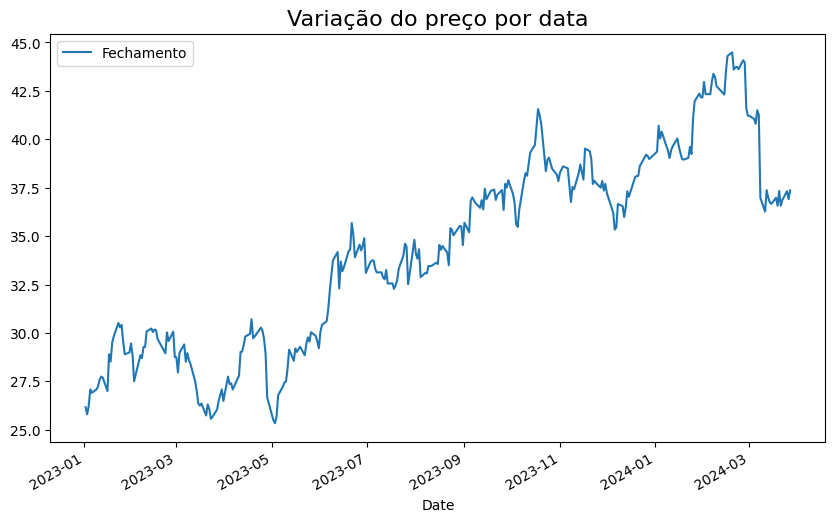

In [23]:
dados['Fechamento'].plot(figsize=(10,6))
plt.title('Variação do preço por data', fontsize=16)
plt.legend(['Fechamento'])

In [8]:
df = dados.head(60).copy()

# Convertendo o índice em uma coluna de data
df['Data'] = df.index

# Convertendo as datas para o formato numérico de matplotlib
# Isso é necessário para que o Matplotlib possa plotar as datas corretamente no gráfico
df['Data'] = df['Data'].apply(mdates.date2num)

df

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume,Data
Data,,,,,,,
2023-01-02,26.850000,27.299999,25.959999,26.170000,20.720245,14365400,19359.0
2023-01-03,26.360001,26.549999,25.480000,25.799999,20.427296,28657500,19360.0
2023-01-04,25.740000,26.900000,25.299999,26.230000,20.767748,24517300,19361.0
2023-01-05,26.570000,27.340000,26.450001,27.080000,21.440742,20367800,19362.0
2023-01-06,27.150000,27.730000,26.820000,26.910000,21.306143,14109900,19363.0
2023-01-09,26.840000,27.309999,26.600000,27.090000,21.448662,12703400,19366.0
2023-01-10,27.070000,27.290001,26.469999,27.250000,21.575342,8949300,19367.0
2023-01-11,27.250000,27.830000,27.190001,27.600000,21.852455,9587400,19368.0
2023-01-12,27.690001,27.830000,27.209999,27.750000,21.971220,13092100,19369.0


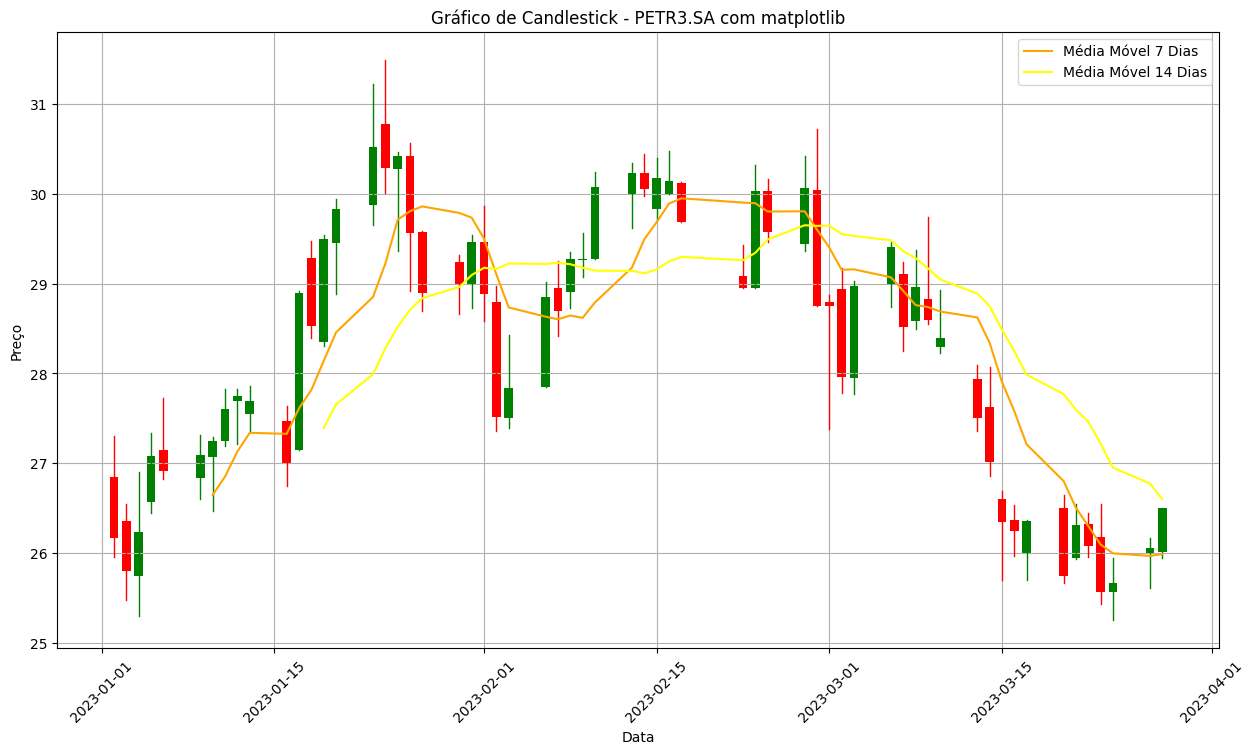

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))

# Vamos definir a largura dos candles no gráfico
width = 0.7

for i in range(len(df)):
    # Determinando a cor do candle
    # Se o preço de fechamento for maior que o de abertura, o candle é verde (a ação valorizou nesse dia).
    # Se for menor, o candle é vermelho (a ação desvalorizou).
    if df['Fechamento'].iloc[i] > df['Abertura'].iloc[i]:
        color = 'green'
    else:
        color = 'red'

    # Desenhando a linha vertical do candle (mecha)
    # Essa linha mostra os preços máximo (topo da linha) e mínimo (base da linha) do dia.
    # Usamos `ax.plot` para desenhar uma linha vertical.
    # [df['Data'].iloc[i], df['Data'].iloc[i]] define o ponto x da linha (a data), e [df['Mínimo'].iloc[i], df['Máximo'].iloc[i]] define a altura da linha.
    ax.plot([df['Data'].iloc[i], df['Data'].iloc[i]],
            [df['Minimo'].iloc[i], df['Maximo'].iloc[i]],
            color=color,
            linewidth=1)

    ax.add_patch(plt.Rectangle((df['Data'].iloc[i] - width/2, min(df['Abertura'].iloc[i], df['Fechamento'].iloc[i])),
                               width,
                               abs(df['Fechamento'].iloc[i] - df['Abertura'].iloc[i]),
                               facecolor=color))

df['MA7'] = df['Fechamento'].rolling(window=7).mean()
df['MA14'] = df['Fechamento'].rolling(window=14).mean()

# Plotando as médias móveis
ax.plot(df['Data'], df['MA7'], color='orange', label='Média Móvel 7 Dias')  # Média de 7 dias
ax.plot(df['Data'], df['MA14'], color='yellow', label='Média Móvel 14 Dias')  # Média de 14 dias
# Adicionando legendas para as médias móveis
ax.legend()

# Formatando o eixo x para mostrar as datas
# Configuramos o formato da data e a rotação para melhor legibilidade
ax.xaxis_date() #O método xaxis_date() é usado para dizer ao Matplotlib que as datas estão sendo usadas no eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Adicionando título e rótulos para os eixos x e y
plt.title("Gráfico de Candlestick - PETR3.SA com matplotlib")
plt.xlabel("Data")
plt.ylabel("Preço")

# Adicionando uma grade para facilitar a visualização dos valores
plt.grid(True)

# Exibindo o gráfico
plt.show()

In [10]:
# Criando subplots
'''
"Primeiro, criamos uma figura que conterá nossos gráficos usando make_subplots.
Isso nos permite ter múltiplos gráficos em uma única visualização.
Aqui, teremos dois subplots: um para o gráfico de candlestick e outro para o volume de transações."

'''
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])

'''
"No gráfico de candlestick, cada candle representa um dia de negociação,
mostrando o preço de abertura, fechamento, máximo e mínimo. Vamos adicionar este gráfico à nossa figura."
'''
# Adicionando o gráfico de candlestick
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Abertura'],
                             high=df['Maximo'],
                             low=df['Minimo'],
                             close=df['Fechamento'],
                             name='Candlestick'),
                             row=1, col=1)

# Adicionando as médias móveis
# Adicionamos também médias móveis ao mesmo subplot para análise de tendências
fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 Dias'),
                         row=1, col=1)

# Adicionando o gráfico de barras para o volume
# Em seguida, criamos um gráfico de barras para o volume de transações, que nos dá uma ideia da atividade de negociação naquele dia
fig.add_trace(go.Bar(x=df.index,
                     y=df['Volume'],
                     name='Volume'),
                     row=2, col=1)

# Atualizando layout
#Finalmente, configuramos o layout da figura, ajustando títulos, formatos de eixo e outras configurações para tornar o gráfico claro e legível.
fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,  # Desativa o range slider
                  width=1100, height=600)

# Mostrando o gráfico
fig.show()

In [7]:
dados = yf.download('PETR3.SA', start='2023-01-01', end='2024-03-27')

[*********************100%%**********************]  1 of 1 completed


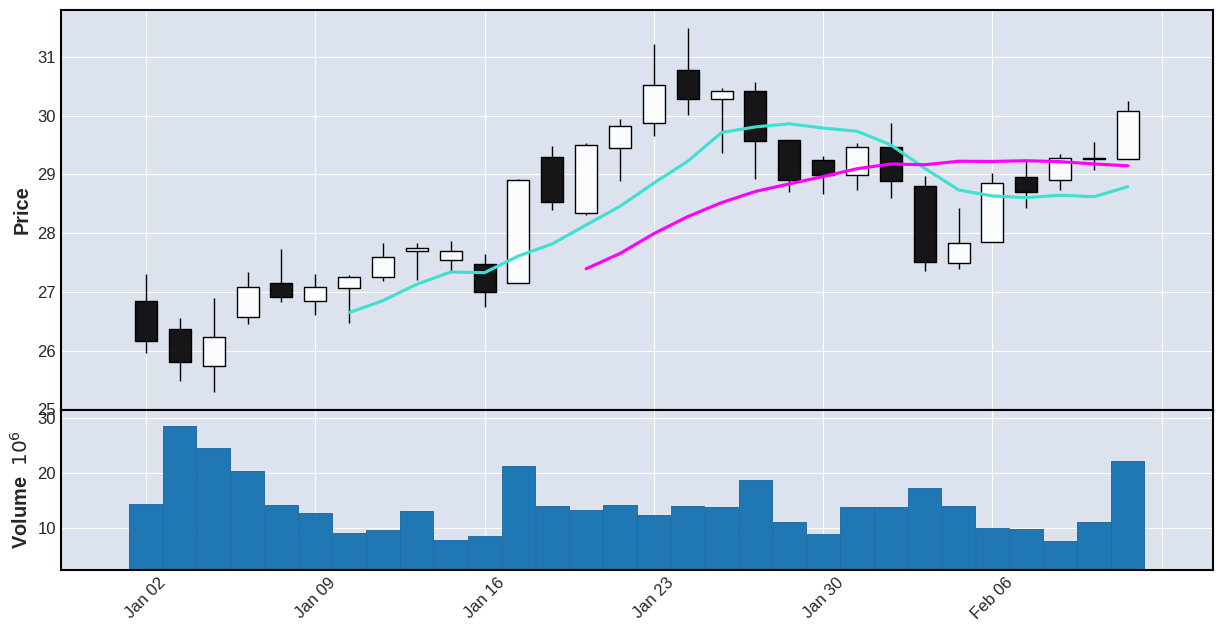

In [14]:
mpf.plot(dados.head(30), type='candle', figsize = (16,8), volume=True, mav=(7,14))